# Author : Indumathi Pandiyan

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Ensemble Learning Project - 3rd Project submitted for PGP-AIML Great Learning on 19-Dec-2021


## PART A

**DOMAIN:** Telecom

**CONTEXT:** A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

**• DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. <n>

The data set includes information about:

• Customers who left within the last month – the column is called Churn <br>
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies <br>
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges <br>
• Demographic info about customers – gender, age range, and if they have partners and dependents <br>
    
**•PROJECT OBJECTIVE:** To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Import All the Libraries

Revision History:
    12-12-2021 - Label Encoding enhanced

In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step.

### STEPS AND TASK [30 Marks]:

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Data Understanding & Exploration: [5 Marks]




<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [2]:
churn1 = pd.read_csv('TelcomCustomer-Churn_1.csv')  # import the csv file
churn1.head(10)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No  
5               Yes     Fiber optic             No  
6               Yes     Fiber optic             No  
7  No phone service             DSL            Yes  
8               Yes     Fiber optic             No  
9                No             DSL            Yes

In [3]:
churn1.shape

(7043, 10)

**Observation 1:** There are 7043 Observations / Rows and 10 Attributes / Columns in churn1 dataset

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]


In [4]:
churn2 = pd.read_csv('TelcomCustomer-Churn_2.csv')  # import the csv file
churn2.head(10)


customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   
5  9305-CDSKC           No              Yes          No         Yes   
6  1452-KIOVK          Yes               No          No         Yes   
7  6713-OKOMC           No               No          No          No   
8  7892-POOKP           No              Yes         Yes         Yes   
9  6388-TABGU          Yes               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   
5             Yes  Month-to-month              Yes           Electronic check   
6              No  Month-to-month              Yes    Credit card (automatic)   
7              No  Month-to-month               No               Mailed check   
8             Yes  Month-to-month              Yes           Electronic check   
9              No        One year               No  Bank transfer (automatic)   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes  
5           99.65        820.5   Yes  
6           89.10       1949.4    No  
7           29.75        301.9    No  
8          104.80      3046.05   Yes  
9           56.15      3487.95    No

In [5]:
churn2.shape

(7043, 12)

**Observation 2**: There are 7043 Observations / Rows and 12 Attributes / Columns in churn2 dataset

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [6]:
# Merging churn1 and chun2 dataset based on the Customer ID
cdata = pd.merge(churn1, churn2, on = 'customerID')

In [7]:
cdata.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [8]:
cdata.shape

(7043, 21)

**Observation 3 :**  There are totally 21 variables which includes 20 independent variable and one target variable **Churn**

In [9]:
cdata.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

**Observation 4:** Only 3 (SeniorCitizen, tenure, MonthlyCharges) of the columns are numerical that is been seen here in describe.

In [10]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation 4:** The variables like gender, partner,dependent etc are objects datatype for model building,
converting to categorical datatype

In [11]:
for feature in cdata.columns: # Loop through all columns in the dataframe
    if cdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        cdata[feature] = pd.Categorical(cdata[feature])# Replace strings with an integer
cdata.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [12]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

**Comments :** All the object datatype are converted to categorical datatypes

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]


In [13]:
churn1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [14]:
churn2.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
cdata.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
churn1.columns.isin(cdata.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [17]:
churn2.columns.isin(cdata.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [18]:
for i in churn1.columns.isin(cdata.columns):
    if(i==False):
        print("Column"+i+ "not available")

In [19]:
if False in churn1.columns.isin(cdata.columns):
    print("Missing columns")
else:
    print("All columns of churn1 are available in merged dataframe")

All columns of churn1 are available in merged dataframe


#### Comments 
isin() will check whether all columns of Churn1 available in cdata. if any of the column name missing it show False
 In the below code, checks whether the churn1 and churn2 columns are available in the new in new dataframe built.

In [20]:
if False in churn1.columns.isin(cdata.columns) and False in churn2.columns.isin(cdata.columns):
    print("Missing columns")
else:
    print("All columns available")

All columns available


In [21]:
combined=list(set(churn1.columns.append(churn2.columns)))
print(combined)

['StreamingTV', 'customerID', 'Dependents', 'gender', 'PaperlessBilling', 'MonthlyCharges', 'PaymentMethod', 'StreamingMovies', 'Partner', 'InternetService', 'Contract', 'TotalCharges', 'TechSupport', 'MultipleLines', 'OnlineBackup', 'SeniorCitizen', 'OnlineSecurity', 'tenure', 'Churn', 'DeviceProtection', 'PhoneService']


In [22]:
print(len(combined))
print(len(cdata.columns))

21
21


In [23]:
print(len(set(combined).difference(cdata.columns)))

0


In [24]:
if len(set(churn1.columns.append(churn2.columns)).difference(cdata.columns))==0:
    print("All columns of churn1 and churn2 are available in merged dataset")
else:
    print("Few columns are missing in the new dataset")

All columns of churn1 and churn2 are available in merged dataset


In [25]:
churn1.columns.union(churn2.columns)

Index(['Churn', 'Contract', 'Dependents', 'DeviceProtection',
       'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup',
       'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod',
       'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV',
       'TechSupport', 'TotalCharges', 'customerID', 'gender', 'tenure'],
      dtype='object')

In [26]:
churn1.columns.union(churn2.columns).isin(cdata.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [27]:
len(churn1.columns.union(churn2.columns))

21

In [28]:
# This method will accept any 2 source dataframes and one destination dataframe as input to check the missed columns
# This function will return True if any columns missing and False otherwise
def isMissingColumnsInMergedData(source1, source2, destination):
    
    #The columns of source1 and Source are united which will have all the united columns
    # comarisonresult would have the array of verification of availability of each column in destination
    comparisonResult=source1.columns.union(source2.columns).isin(destination)
    
    #if any one of the column is missed in the merged data set the comparison Result would have value False
    result = False in comparisonResult
    return result

In [29]:
print("Merged data has missed columns ",isMissingColumnsInMergedData(churn1,churn2,cdata))

Merged data has missed columns  False


**Observation 5** :It is been verified that all the columns of churn1 and churn2 are available in the new dataset cdata

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 2. Data Cleaning & Analysis: [15 Marks]

## EDA Discriptive Statistics

## Mean

In [30]:
cdata.mean()  # print the mean of each attribute. Ignore "Senior Citizen as it is not a continuous variable"

SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

In [31]:
cdata["SeniorCitizen"].mode() # Most of the customer are not senior citizen

0    0
dtype: int64

In [32]:
cdata.median()

SeniorCitizen      0.00
tenure            29.00
MonthlyCharges    70.35
dtype: float64

In [33]:
dupes = cdata.duplicated()
sum(dupes)

0

**Observation 6** : There are no duplicates available in the dataset

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [34]:
cdata.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### comments: There is no missing values found.

In [35]:
cdata.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [36]:
cdata.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [37]:
cdata.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [38]:
# This function would return all the categorical variables of a dataset
def findCategoricalData(data):
    categorical_cols=data.select_dtypes(exclude=[np.number]).columns
    return categorical_cols

In [39]:
# This function would return all the Numerical variables of a dataset
def findNumericalData(data):
    numerical_cols=data.select_dtypes(include=[np.number]).columns
    return numerical_cols

In [40]:
categoricalColumns =findCategoricalData(cdata)
print(categoricalColumns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [41]:
numericalColumns=findNumericalData(cdata)
print(numericalColumns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [42]:
# Print the valuecounts of Categorical columns to verify the unexpected data
for col in cdata[categoricalColumns]:
    print(cdata[col].value_counts())
      

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: in

**Observation**:
1. CustomerID is the identifier hence its a String object. <br>
2. gender having values male and female. There are no unexpected values<br>
3. Partner specifies whether the customer has Partner or not, its having only Yes and No values<br>
4. Dependents also has Yes or No to specify whether the customer has Dependents are not<br>
5. PhoneService also has Yes or No value to specify customer availed phone service are not<br>
6. MultipleLines has 3 values, Yes, No and No Phoneservice. This specify the customer will have multiline only when they has Phone service. So no unexpected values<br>
7.InternetService has 3 values DSL, FiberOptic and No. This specifies if customer has internet service he has Either DSL or Fiber Optic.<br>
8.OnlineSecurity, OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies  has 3 values Yes, No and No Internet service. These services are available only for people having internet service. So no unexpected values.<br>
9. Contract has 3 values Month-to-month, Two year and One Year. The contract is either one year, two year or month to month. No unexpected values<br>
10.PaperlessBilling has either Yes or No values<br>
11. PaymentMethod has four values Electronic check,Mailed check,Bank transfer (automatic) and Credit card (automatic) <br>
12. Total charges represents the total charges, it should be continuous variable to be converted to Numerical type

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]


#### Making the copy of original data set before doing any changes

In [43]:
customerdata =cdata.copy()

#### Converting the TotalCharges to the Float datatype as it is been observed as categorical type in previous analysis

In [44]:
customerdata['TotalCharges'] = pd.to_numeric(customerdata['TotalCharges'], errors='coerce')

In [45]:
customerdata['TotalCharges'].dtypes

dtype('float64')

**Comments**: Datatype of Total charges been converted to float datatype

In [46]:
customerdata.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [47]:
customerdata['TotalCharges'].isnull().sum()

11

**Comments:** There are 11 null values observed in Totalcharges

In [48]:
customerdata[['tenure','MonthlyCharges','TotalCharges']].head()


tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

**Comments:** Its observed that Total charges is result of multiplication of Tenure and Monthly Charges

In [49]:
customerdata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [50]:
#Finding the columns which has any null value
null_columns=customerdata.columns[customerdata.isnull().any()]
noOfNullColumns=customerdata[null_columns].isnull().sum()
print(noOfNullColumns)

# Finding the rows in which null values are available
nullindices=customerdata[customerdata["TotalCharges"].isnull()][null_columns]
print(nullindices.index)

TotalCharges    11
dtype: int64
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [51]:
# Print the rows in which Total charges are null or NaN              
customerdata[['tenure','MonthlyCharges','TotalCharges']].iloc[customerdata.index.isin(nullindices.index)]

tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN

In [52]:
cdata_copy=customerdata.copy()
#cdata_copy['TotalCharges']=cdata_copy['TotalCharges'].fillna(cdata_copy['tenure']*cdata_copy['MonthlyCharges'])

# Impute Monthly charges as Total charges as tenure is 0 for all these rows
cdata_copy['TotalCharges']=cdata_copy['TotalCharges'].fillna(cdata_copy['MonthlyCharges'])
            


**Comments:** As per previous understanding Totalcharges is multiplication of tenure and Monthly charges. As tenure is zero for all these null values assumption made is they are not still completed the required tenure[may be not completed a month]. Hence imputed **Total charges** with **Monthly charges**

In [53]:
# Verifying whether all the values are imputed as expected
cdata_copy[['tenure','MonthlyCharges','TotalCharges']].iloc[cdata_copy.index.isin(nullindices.index)]

tenure  MonthlyCharges  TotalCharges
488        0           52.55         52.55
753        0           20.25         20.25
936        0           80.85         80.85
1082       0           25.75         25.75
1340       0           56.05         56.05
3331       0           19.85         19.85
3826       0           25.35         25.35
4380       0           20.00         20.00
5218       0           19.70         19.70
6670       0           73.35         73.35
6754       0           61.90         61.90

**Comments:** Tenure is 0 for all these columns so imputed the total charges with Monthly charges

In [54]:
cdata_copy.describe().T

count         mean          std    min     25%      50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.00   
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.798992  2266.730170  18.80  398.55  1394.55   

                    75%      max  
SeniorCitizen      0.00     1.00  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

**Obervation** : <br> 
SeniorCitizen, tenure, monthly charges and Total charges are numerical columns. Senior Citizen is categorical, Senior Citizen or not. <br>


**Tenure** - is having values between 9 and 72. Mean(32.37) is greater than the Median(29.00), so the distribution is positively skewed.<br>
**Monthly charges** - Having values between 18.25 to 118.75,  mean(64.76) is less than median(70.35) and its negatively skewed<br>
**Total charges** - Having values between 18.80 to 8684. mean(2279.79) is greater than the Median(1394.55)so the distribution is positively skewed<br>

**Reference**

**Positive skewness:** if the mean is greater than the median, the distribution is positively skewed.<br>
**Negative skewness:** If the mean is less than the median, the distribution is negatively skewed.

In [55]:
numericalColumns=findNumericalData(cdata_copy)
print(numericalColumns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [56]:
# Print the datatypes of numerical values
for col in cdata_copy[numericalColumns]:
    print(col,cdata_copy[col].dtypes)

SeniorCitizen int64
tenure int64
MonthlyCharges float64
TotalCharges float64


**Comments** : Continuous values like Monthly charges and Total charges are in float datatype

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C.Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage  distribution in the pie-chart. [4 Marks]

### Function for building the pie chart accept only cdata

In [57]:
def buildPieChart(data):
    colors = sns.color_palette('pastel')[0:5]
    categoricalColumns=findCategoricalData(data)
   # print(categoricalColumns)
    for col in data[categoricalColumns]:
        if (col=='customerID'):
            print(' customerID is Excluded for piechart')
        else:
            plt.title("Pie chart for "+ col)
            cdata[col].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, colors=colors)
            plt.show()
    

 customerID is Excluded for piechart


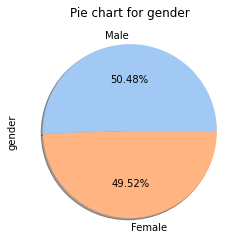

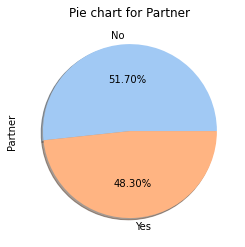

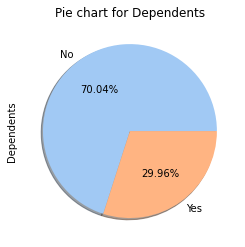

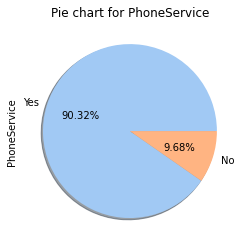

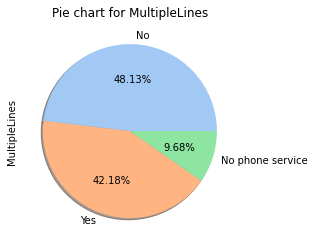

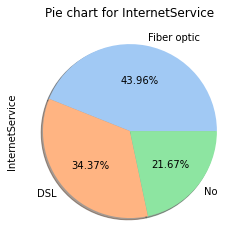

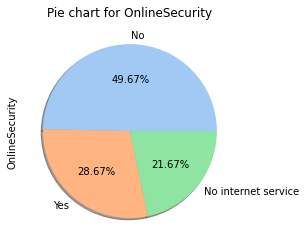

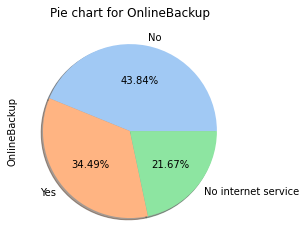

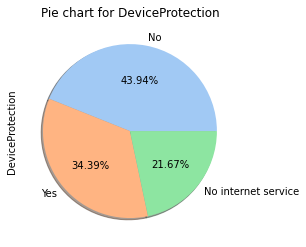

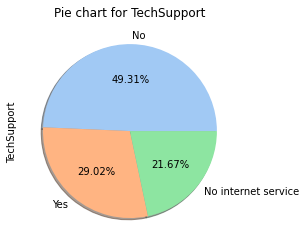

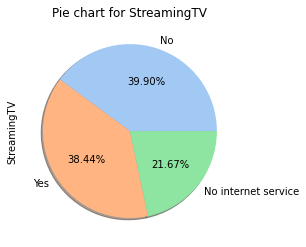

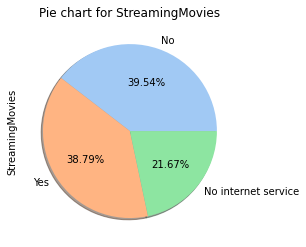

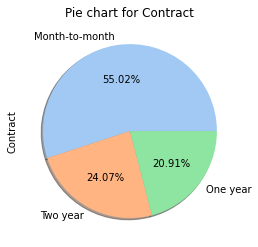

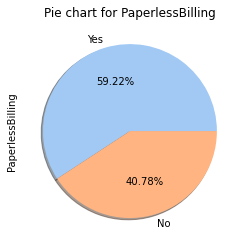

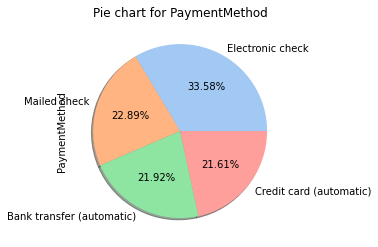

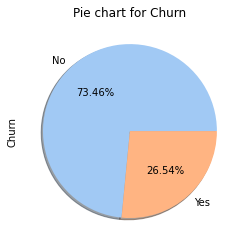

In [58]:
buildPieChart(cdata_copy)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> D. Share insights for Q2.c. [2 Marks]

Follwing are the categorical features in the customerdata set<br>
**1. gender :** Female and Male customers are almost equal(Male - 50.48% and female -49.52%)<br>
**2. Partner :** Customers having partner also almost equal (Yes -51.70% and  No -48.30%)<br>
**3. Dependents :** Only one third of the Customers having dependents and 2/3rd dont have dependents (No - 70% and Yes- 30%)<br>
**4. PhoneService :** Almost 90% of people has phone service.<br>
**5. MultipleLines:** Out of 90% of population has phone service, 42% has multiple lines and 48% do not have Multilines<br>
**6.InternetService :** Nearly 22% of the population does not have Internet services. And in the 78% of remaining population 44% has fibre optic service and nearly 34 % has DSL service. <br>

Following are the internet based services and so observation made on how many percentage got the specific internet based service<br> 
   &emsp; **6.a OnlineSecurity:**  nearly 50% does not have online security and 28% has the online security.<br>
   &emsp; **6.b OnlineBackup :** 44% does not have OnlineBackup and 34% has online backup<br>
   &emsp; **6.c.DeviceProtection:** Similarly 44% does not have Device protection and 34% has Device Protection<br>
   &emsp; **6.d.Techsupport :** 49% does not have TechSupport Service and 29% has Techsupport service<br>
   &emsp; **6.e.StreamintTV :**  38% has StreamingTv and 40% doesnot have Streaming TV<br>
   &emsp; **6.f.StreamingMovies:** 38.7 has StreamingMovies and 39.3% doesnot have Streaming Movies<br>
    
**7.Contract :** More percentage (55%) of customers opted for Month to month contract followed by Two year(24%) and one year(21%) respectively.<br>
**8.PaperlessBilling :** 60% people prefers paperless billing where as nearly 40% not have paperless bill<br>
**9.PaymentMethod :** ElectronicCheck(33.5%) and mailed check 22.8% followed by Bank transfer(21%) and Credit card(21%) <br>
**10.Churn :** Churn rate is 26.5% <br>


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [59]:
categoricalColumns = findCategoricalData(cdata_copy)
print(categoricalColumns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


### Verifying the categorical values for inputation

In [60]:
categoricalColumns=findCategoricalData(cdata_copy)

# print(categoricalColumns)
for col in cdata_copy[categoricalColumns]:
        if (col=='customerID'):
               pass
        else:
            print(cdata[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [61]:
cdata_copy.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [62]:
replaceStruct = {
                 "gender":     {"Male": 0, "Female": 1 },
                  "Partner":     {"No": 0, "Yes": 1 },
                "Dependents": {"No": 0, "Yes": 1 },
                 "PhoneService": {"No": 0, "Yes": 1 },
                 "MultipleLines": {"No": 0, "Yes": 1, "No phone service" : 2 },
                 "InternetService": {"Fiber optic": 1, "DSL": 2, "No" :0},
                 "OnlineSecurity": {"No": 0, "Yes": 1, "No internet service" : 2 },
                 "OnlineBackup": {"No": 0, "Yes": 1, "No internet service" : 2 },
                 "OnlineSecurity": {"No": 0, "Yes": 1, "No internet service" : 2 },
                 "DeviceProtection": {"No": 0, "Yes": 1, "No internet service" : 2 },
                 "TechSupport": {"No": 0, "Yes": 1, "No internet service" : 2 },
                 "StreamingTV": {"No": 0, "Yes": 1, "No internet service" : 2 },
                 "StreamingMovies": {"No": 0, "Yes": 1, "No internet service" : 2 }, 
                  "Contract":     {"Month-to-month": 1, "One year": 2,"Two year": 3 }, 
                  "PaperlessBilling":     {"No": 0, "Yes": 1 }, 
                  "Churn":     {"No": 0, "Yes": 1 } 
                    }
oneHotCols=["PaymentMethod"]


In [63]:
encoded_data=cdata_copy.replace(replaceStruct)
encoded_data=pd.get_dummies(encoded_data, columns=oneHotCols)
encoded_data.head(10)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   
5  9305-CDSKC       1              0        0           0       8   
6  1452-KIOVK       0              0        0           1      22   
7  6713-OKOMC       1              0        0           0      10   
8  7892-POOKP       1              0        1           0      28   
9  6388-TABGU       0              0        0           1      62   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              2                2               0  ...   
1             1              0                2               1  ...   
2             1              0                2               1  ...   
3             0              2                2               1  ...   
4             1              0                1               0  ...   
5             1              1                1               0  ...   
6             1              1                1               0  ...   
7             0              2                2               1  ...   
8             1              1                1               0  ...   
9             1              0                2               1  ...   

   StreamingMovies  Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
0                0         1                 1           29.85         29.85   
1                0         2                 0           56.95       1889.50   
2                0         1                 1           53.85        108.15   
3                0         2                 0           42.30       1840.75   
4                0         1                 1           70.70        151.65   
5                1         1                 1           99.65        820.50   
6                0         1                 1           89.10       1949.40   
7                0         1                 0           29.75        301.90   
8                1         1                 1          104.80       3046.05   
9                0         2                 0           56.15       3487.95   

   Churn  PaymentMethod_Bank transfer (automatic)  \
0      0                                        0   
1      0                                        0   
2      1                                        0   
3      0                                        1   
4      1                                        0   
5      1                                        0   
6      0                                        0   
7      0                                        0   
8      1                                        0   
9      0                                        1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   
5                                      0                               1   
6                                      1                               0   
7                                      0                               0   
8                                      0                               1   
9                                      0                               0   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                   

#### Print summary of dataframe

In [64]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   category
 1   gender                                   7043 non-null   int64   
 2   SeniorCitizen                            7043 non-null   int64   
 3   Partner                                  7043 non-null   int64   
 4   Dependents                               7043 non-null   int64   
 5   tenure                                   7043 non-null   int64   
 6   PhoneService                             7043 non-null   int64   
 7   MultipleLines                            7043 non-null   int64   
 8   InternetService                          7043 non-null   int64   
 9   OnlineSecurity                           7043 non-null   int64   
 10  OnlineBackup                        

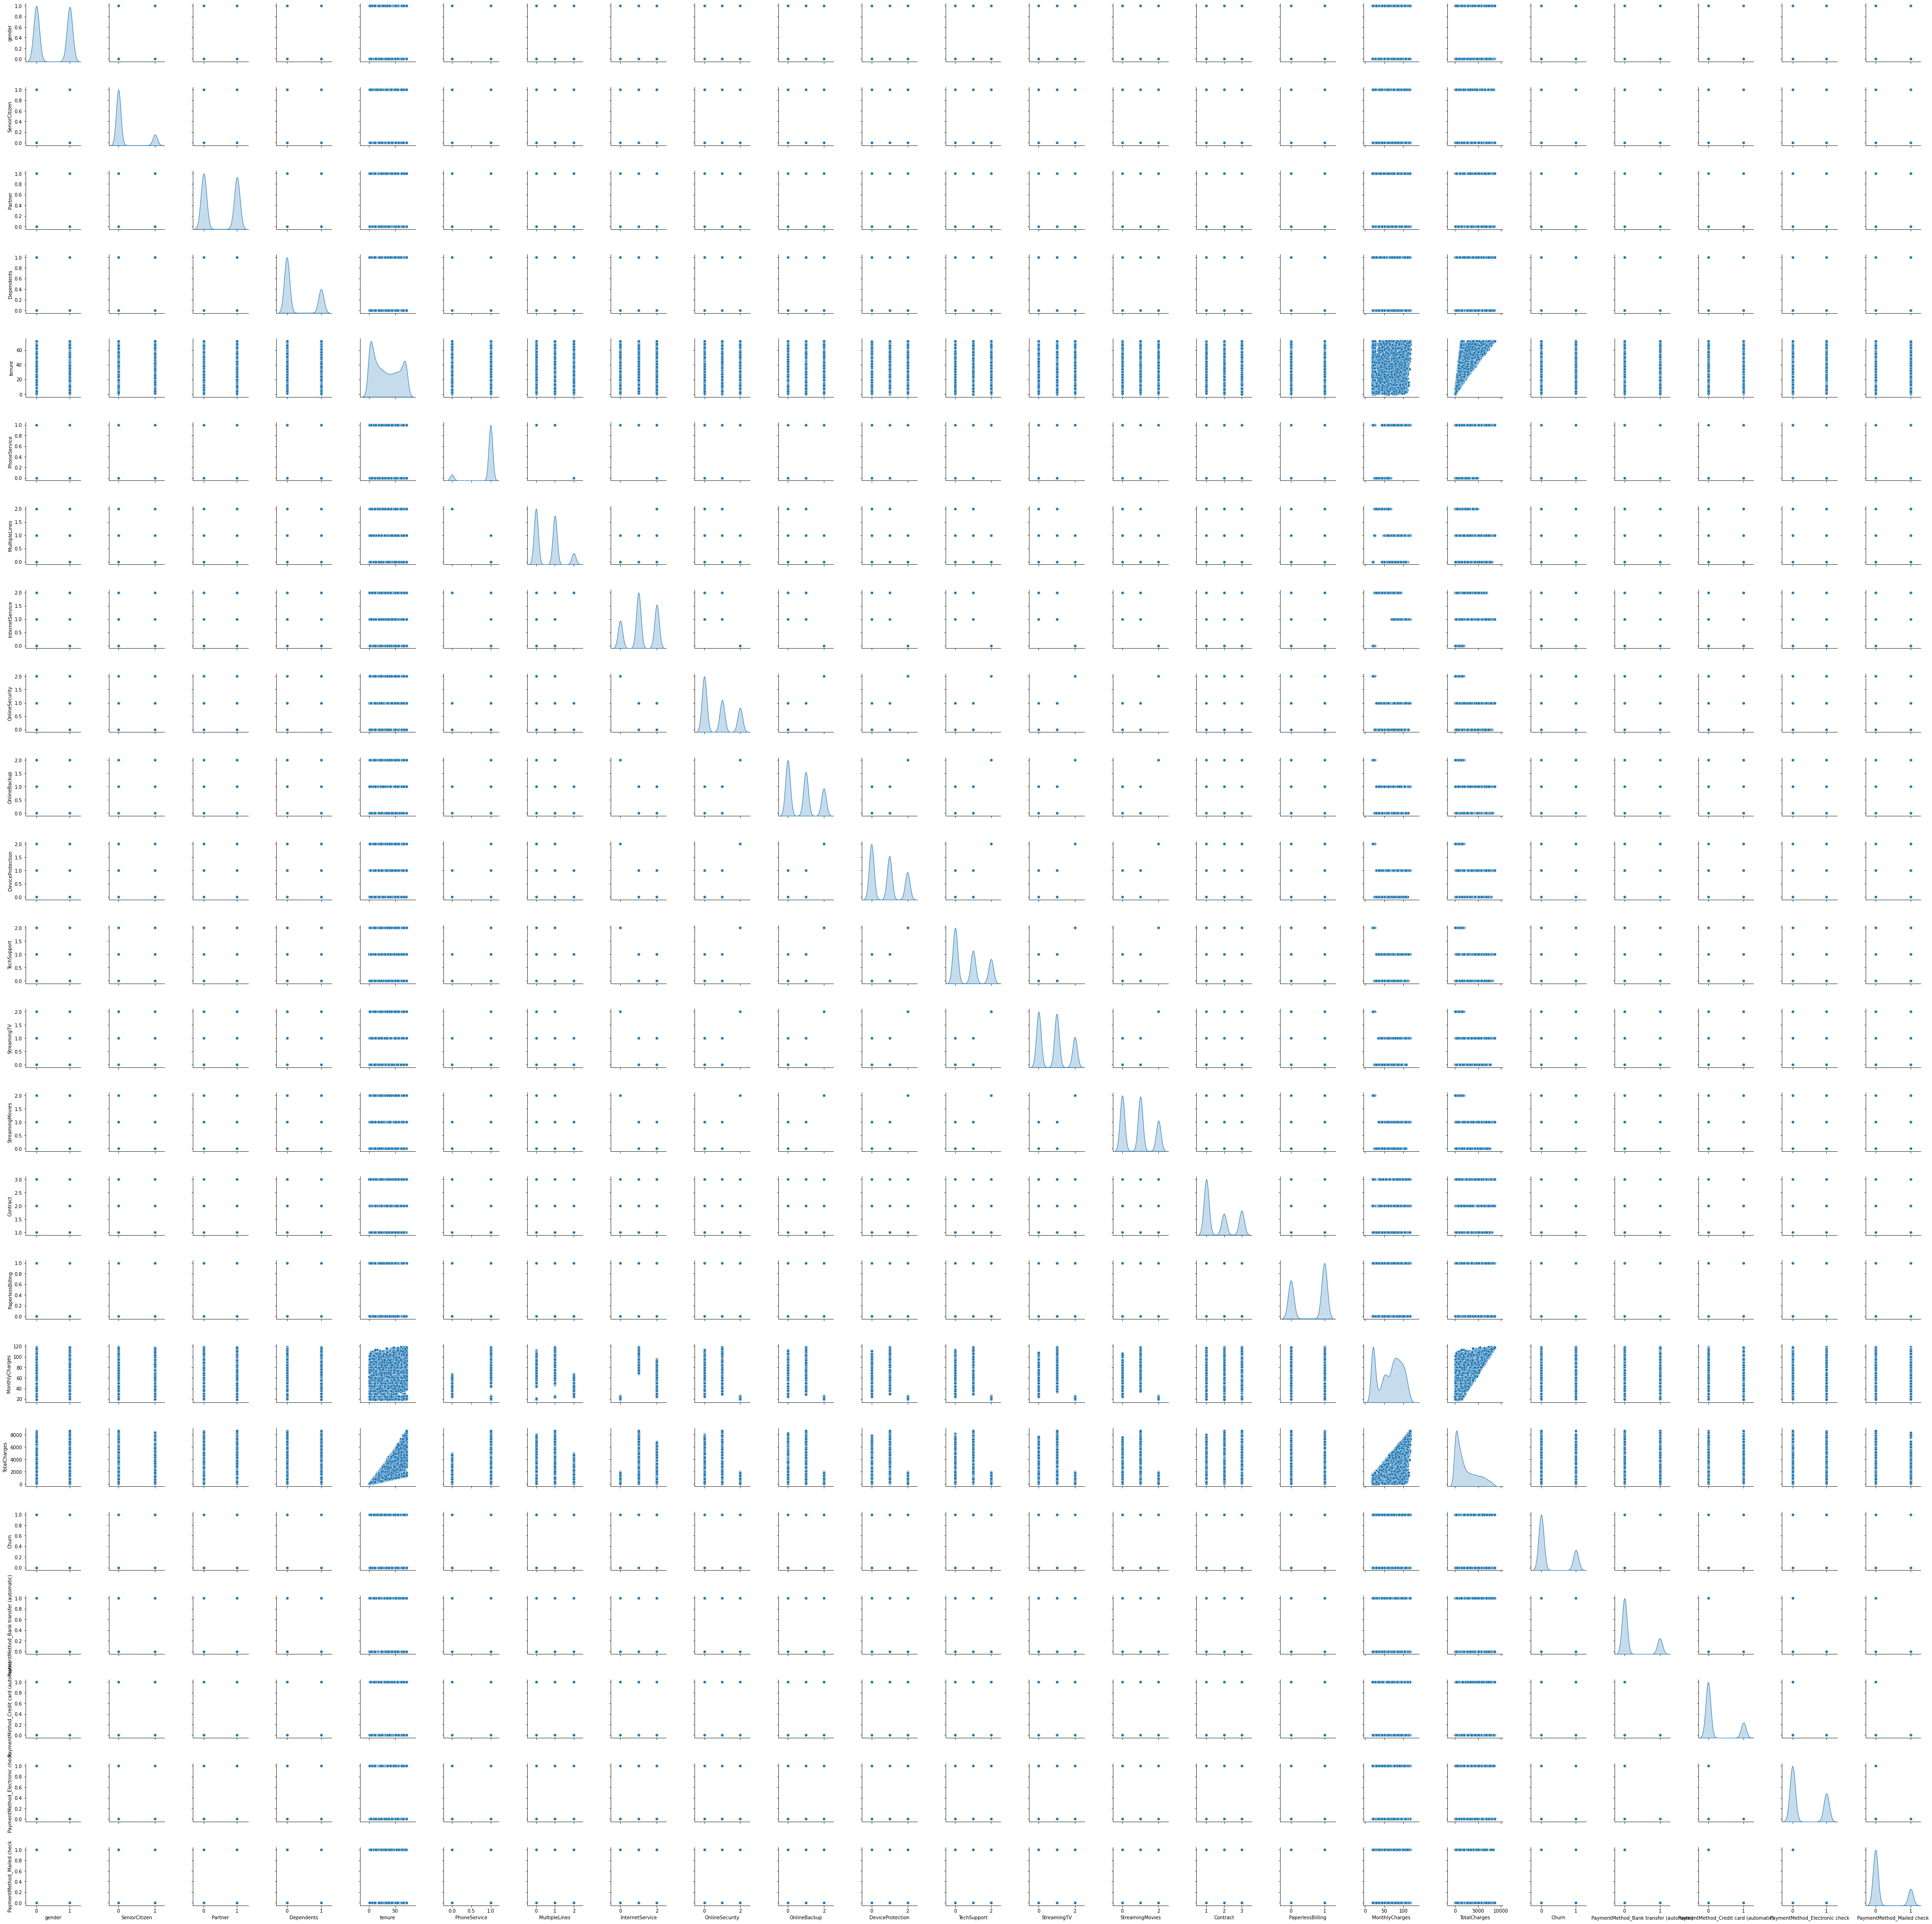

In [65]:
sns.pairplot(encoded_data, diag_kind= 'kde')
plt.show()

In [134]:
#Understand the Target variable distribution
encoded_data['Churn'].value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

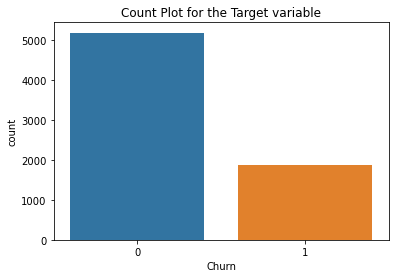

In [136]:

# count plot on single categorical variable
sns.countplot(x ='Churn', data = encoded_data)
plt.title("Count Plot for the Target variable")
# Show the plot
plt.show()


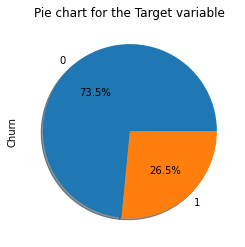

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
labels = ['Churn']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.title("Pie chart for the Target variable")
encoded_data['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

plt.show()

 #### heatmap to understand correlation between all features

In [141]:
corr =encoded_data.corr()
print(corr)

                                           gender  SeniorCitizen   Partner  \
gender                                   1.000000       0.001874  0.001808   
SeniorCitizen                            0.001874       1.000000  0.016479   
Partner                                  0.001808       0.016479  1.000000   
Dependents                              -0.010517      -0.211185  0.452676   
tenure                                  -0.005106       0.016567  0.379697   
PhoneService                             0.006488       0.008576  0.017706   
MultipleLines                            0.000485       0.099883  0.090981   
InternetService                         -0.000863       0.032310 -0.000891   
OnlineSecurity                           0.003429      -0.210897  0.081850   
OnlineBackup                             0.002032      -0.152780  0.087055   
DeviceProtection                        -0.005092      -0.157095  0.094451   
TechSupport                             -0.000985      -0.223770

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(df2.corr(), center=0, cmap='BrBG', annot=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(encoded_data.corr(), center=0, cmap='mako', annot=True, fmt='.2f', linewidths=0.05, mask=mask)
ax.set_title('Heat map of customer data for Churn')

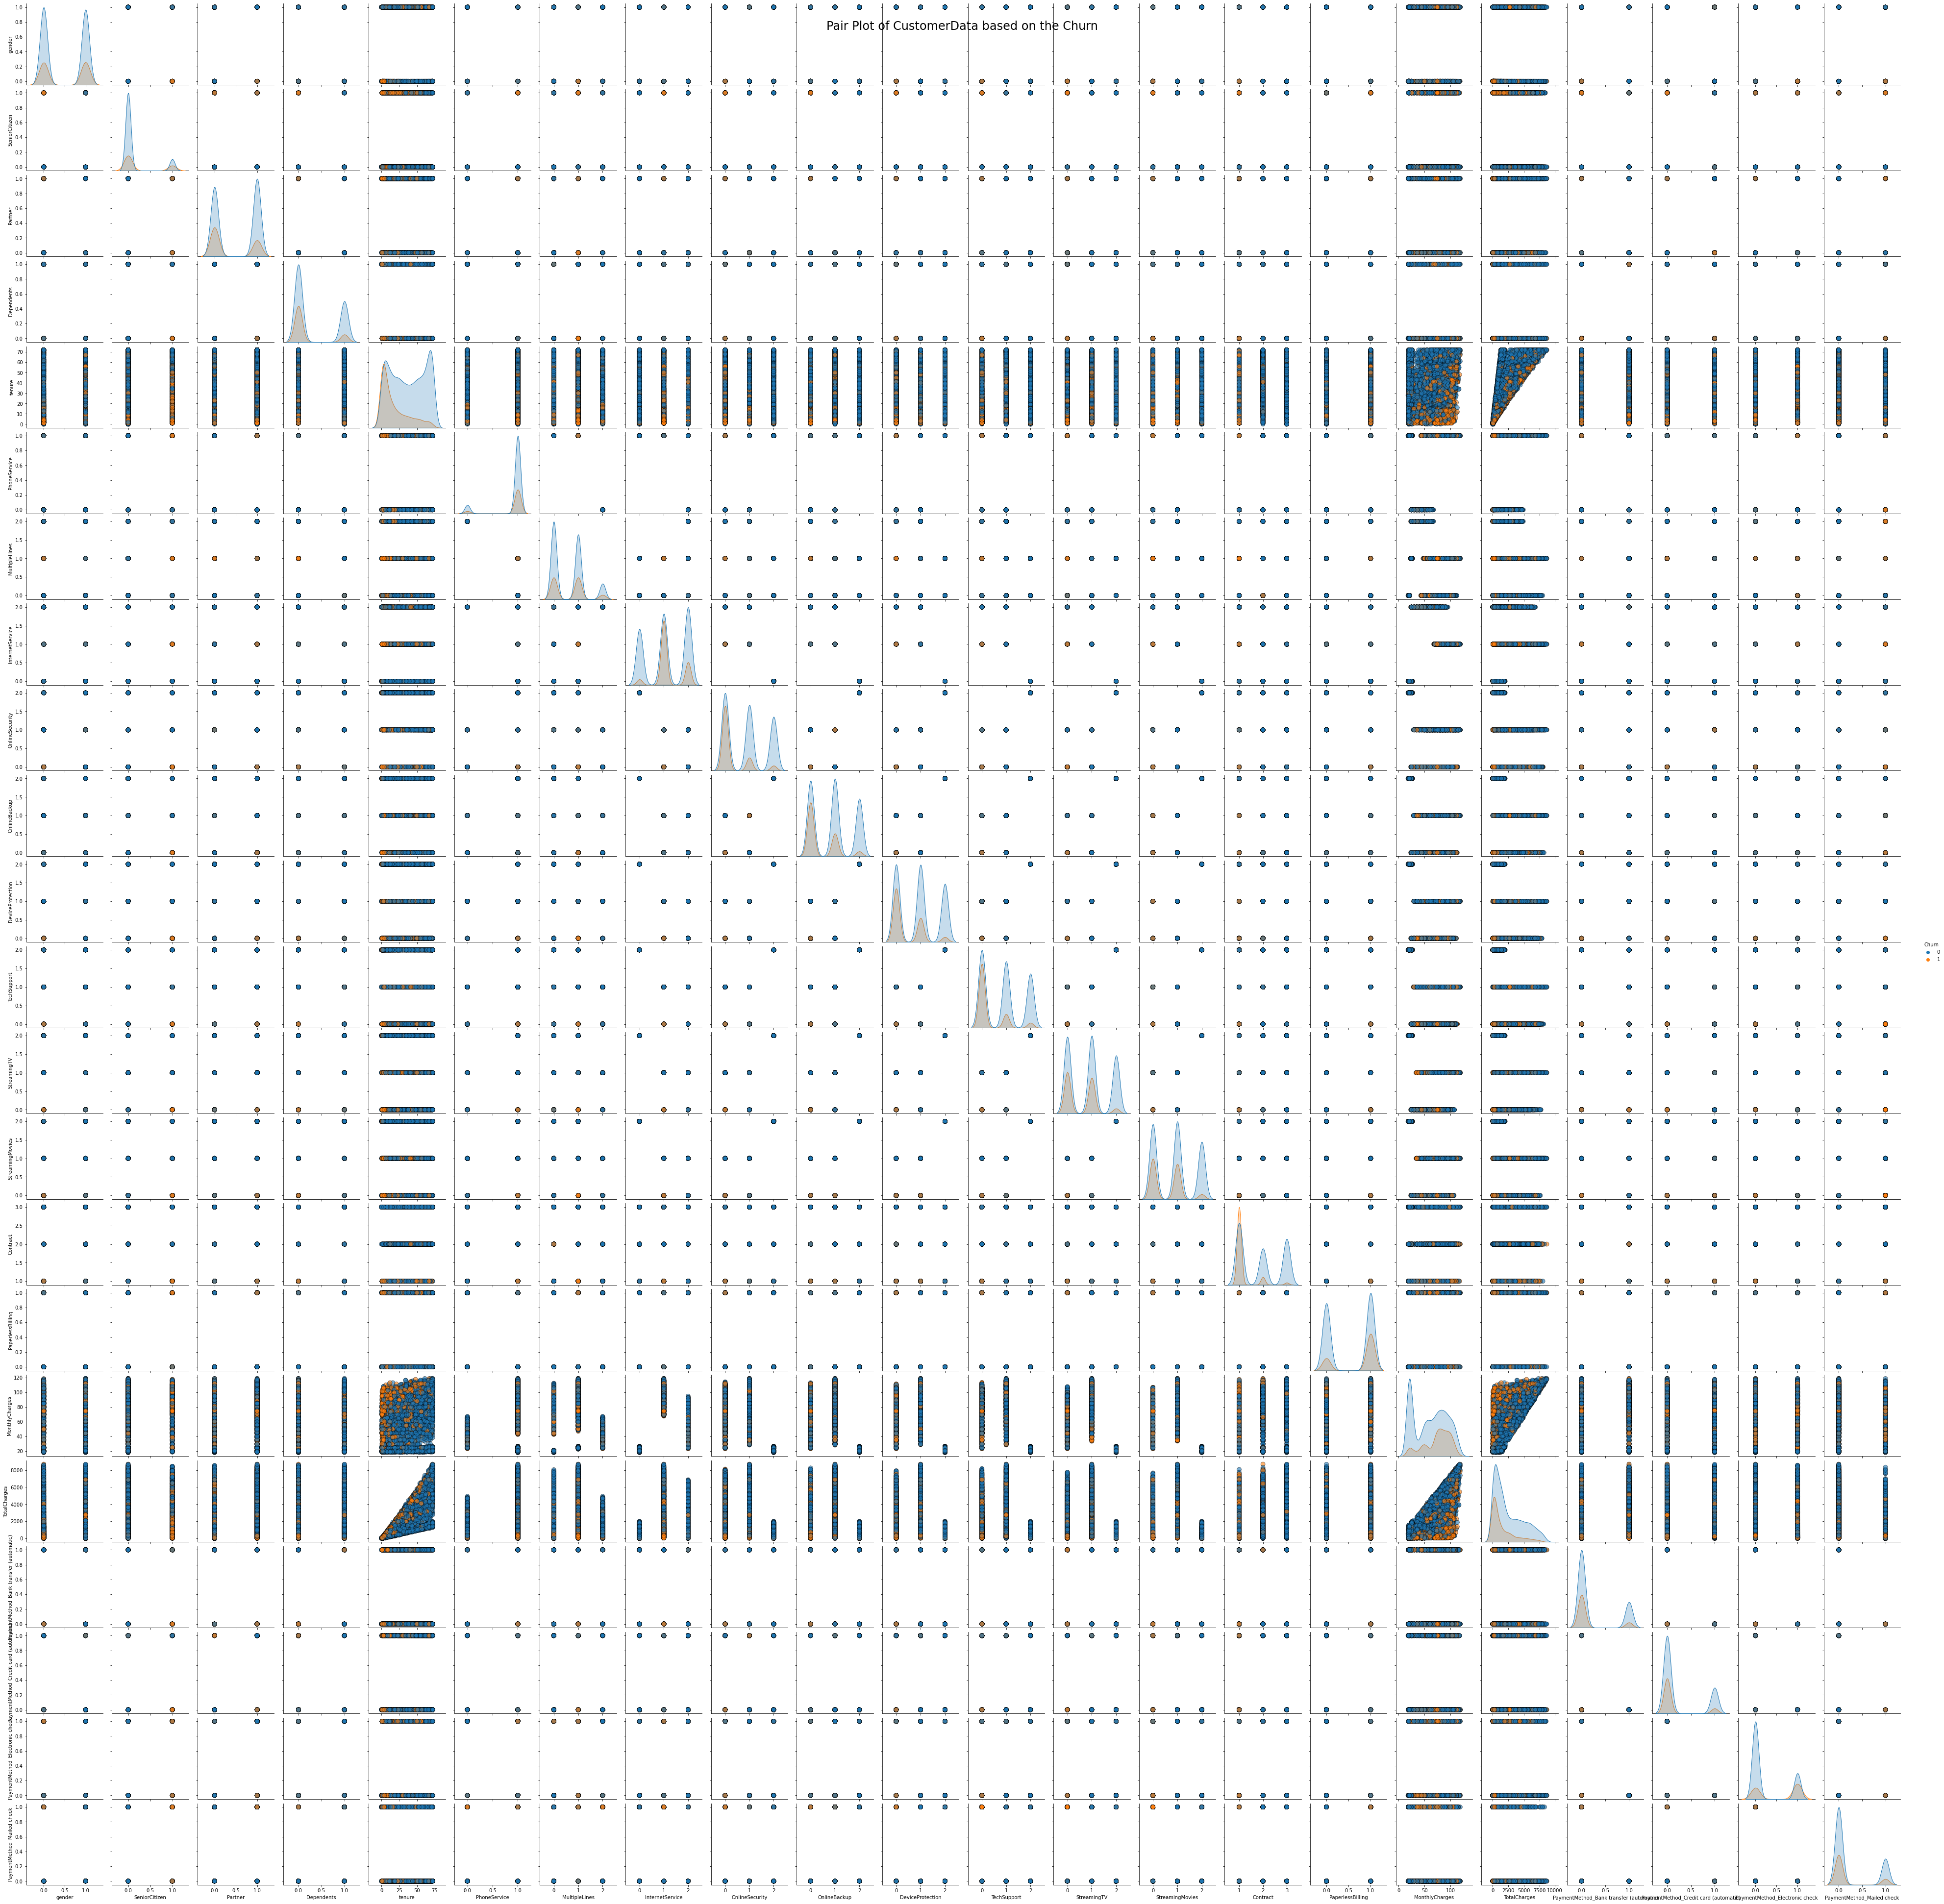

In [145]:
sns.pairplot(encoded_data, hue = 'Churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
             )
# Title 
plt.suptitle('Pair Plot of CustomerData based on the Churn', 
             size = 24);

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> F.Split the data into 80% train and 20% test. [1 Marks]

In [67]:
encoded_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [68]:
# drop "CustomerID" a along with the target column
X = encoded_data.drop(columns= ['customerID','Churn'])
y = encoded_data.Churn

#### Split 80% Train and 20% Test data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [70]:
X_train.shape

(5634, 22)

In [71]:
X_test.shape

(1409, 22)

In [72]:
encoded_data.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              2                2               0  ...   
1             1              0                2               1  ...   
2             1              0                2               1  ...   
3             0              2                2               1  ...   
4             1              0                1               0  ...   

   StreamingMovies  Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
0                0         1                 1           29.85         29.85   
1                0         2                 0           56.95       1889.50   
2                0         1                 1           53.85        108.15   
3                0         2                 0           42.30       1840.75   
4                0         1                 1           70.70        151.65   

   Churn  PaymentMethod_Bank transfer (automatic)  \
0      0                                        0   
1      0                                        0   
2      1                                        0   
3      0                                        1   
4      1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 24 columns]

In [73]:
encoded_data.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.495244       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.615505         1.127077        0.720006   
std        0.295752       0.656039         0.737796        0.796885   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         1.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       1.000000         2.000000        1.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  ...  StreamingMovies     Contract  PaperlessBilling  \
count   7043.000000  ...      7043.000000  7043.000000       7043.000000   
mean       0.778220  ...         0.821241     1.690473          0.592219   
std        0.778472  ...         0.761725     0.833755          0.491457   
min        0.000000  ...         0.000000     1.000000          0.000000   
25%        0.000000  ...         0.000000     1.000000          0.000000   
50%        1.000000  ...         1.000000     1.000000          1.000000   
75%        1.000000  ...         1.000000     2.000000          1.000000   
max        2.000000  ...         2.000000     3.000000          1.000000   

       MonthlyCharges  TotalCharges        Churn  \
count     7043.000000   7043.000000  7043.000000   
mean        64.761692   2279.798992     0.265370   
std         30.090047   2266.730170     0.441561   
min         18.250000     18.800000     0.000000   
25%         35.500000    398.550000     0.000000   
50%         70.350000   1394.550000     0.000000   
75%         89.850000   3786.600000     1.000000   
max        118.750000   8684.800000     1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7043.000000   
mean                                  0.219225   
std                                   0.413751   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       PaymentMethod_Mailed check  
count                 7043.000000  
mean                     0.228880  
std                      0.420141  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000  

[8 rows x 23 columns]

In [74]:
y_train.head()

1182    0
4328    0
6091    1
4870    0
4683    0
Name: Churn, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> G.Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [75]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

count          mean       std  \
gender                                   7043.0 -1.387818e-16  1.000071   
SeniorCitizen                            7043.0  6.417792e-16  1.000071   
Partner                                  7043.0  5.934956e-17  1.000071   
Dependents                               7043.0 -8.310515e-17  1.000071   
tenure                                   7043.0  5.945991e-17  1.000071   
PhoneService                             7043.0 -2.087449e-15  1.000071   
MultipleLines                            7043.0  1.092489e-15  1.000071   
InternetService                          7043.0  2.733942e-16  1.000071   
OnlineSecurity                           7043.0 -3.673762e-16  1.000071   
OnlineBackup                             7043.0  5.502406e-16  1.000071   
DeviceProtection                         7043.0  8.414081e-16  1.000071   
TechSupport                              7043.0  1.435109e-16  1.000071   
StreamingTV                              7043.0 -2.520780e-16  1.000071   
StreamingMovies                          7043.0 -8.764346e-16  1.000071   
Contract                                 7043.0 -1.072864e-16  1.000071   
PaperlessBilling                         7043.0 -5.924868e-16  1.000071   
MonthlyCharges                           7043.0 -8.291599e-17  1.000071   
TotalCharges                             7043.0 -1.269277e-16  1.000071   
PaymentMethod_Bank transfer (automatic)  7043.0 -6.454206e-16  1.000071   
PaymentMethod_Credit card (automatic)    7043.0  2.888188e-16  1.000071   
PaymentMethod_Electronic check           7043.0  4.010233e-16  1.000071   
PaymentMethod_Mailed check               7043.0 -8.683795e-16  1.000071   

                                              min       25%       50%  \
gender                                  -0.990532 -0.990532 -0.990532   
SeniorCitizen                           -0.439916 -0.439916 -0.439916   
Partner                                 -0.966622 -0.966622 -0.966622   
Dependents                              -0.654012 -0.654012 -0.654012   
tenure                                  -1.318165 -0.951682 -0.137274   
PhoneService                            -3.054010  0.327438  0.327438   
MultipleLines                           -0.938280 -0.938280  0.586128   
InternetService                         -1.527734 -0.172250 -0.172250   
OnlineSecurity                          -0.903589 -0.903589  0.351386   
OnlineBackup                            -0.999747 -0.999747  0.284912   
DeviceProtection                        -0.998016 -0.998016  0.286059   
TechSupport                             -0.909172 -0.909172  0.347362   
StreamingTV                             -1.071457 -1.071457  0.238887   
StreamingMovies                         -1.078210 -1.078210  0.234693   
Contract                                -0.828207 -0.828207 -0.828207   
PaperlessBilling                        -1.205113 -1.205113  0.829798   
MonthlyCharges                          -1.545860 -0.972540  0.185733   
TotalCharges                            -0.997542 -0.829998 -0.390568   
PaymentMethod_Bank transfer (automatic) -0.529885 -0.529885 -0.529885   
PaymentMethod_Credit card (automatic)   -0.525047 -0.525047 -0.525047   
PaymentMethod_Electronic check          -0.711026 -0.711026 -0.711026   
PaymentMethod_Mailed check              -0.544807 -0.544807 -0.544807   

                                              75%       max  
gender                                   1.009559  1.009559  
SeniorCitizen                           -0.439916  2.273159  
Partner                                  1.034530  1.034530  
Dependents                               1.529024  1.529024  
tenure                                   0.921455  1.613701  
PhoneService                             0.327438  0.327438  
MultipleLines                            0.586128  2.110535  
InternetService                          1.183234  1.183234  
OnlineSecurity                           0.351386  1.606361  
OnlineBackup    

In [76]:
#Split with ScaledX
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=10)

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#00b3e5;"> 3. Model building and Improvement: [10 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]

In [77]:
import xgboost as xgb

In [78]:
# fit model no training data
import xgboost as xgb
from xgboost import XGBClassifier
#model = XGBClassifier(n_estimators=10,seed=123, enable_categorical=True,tree_method='gpu_hist')
model = XGBClassifier()
print(model.get_params)
#model =xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1,enable_categorical=True)
model.fit(X_train, y_train)
#print(model)

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)>
[20:58:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# Predict the labels of the test set: preds
preds = model.predict(X_test)

In [80]:
# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.797729


In [81]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]

### Improve XGBoost with K-Fold Crossvalidation

In k-fold cross validation
all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once.
XGBoost supports k-fold cross validation via the cv() method. 
specify the nfolds parameter, which is the number of cross validation sets you want to build. 
Also, it supports following  other parameters

**num_boost_round:** denotes the number of trees you build (analogous to n_estimators) <br>
**metrics:** tells the evaluation metrics to be watched during CV <br>
**as_pandas:** to return the results in a pandas DataFrame.<br>
**early_stopping_rounds:** finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.<br>
**seed:** for reproducibility of results.<br>

In [88]:
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5, 
          'alpha': 10}

In [86]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [93]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

#### cv_results contains train and test RMSE metrics for each boosting round

In [94]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.484554        0.000296        0.484874       0.000339
1         0.468370        0.001197        0.468903       0.001644
2         0.453211        0.000936        0.454046       0.001924
3         0.443123        0.000439        0.444213       0.001817
4         0.433874        0.001258        0.435111       0.002731

 #### final boosting round metric

In [95]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.368221
Name: test-rmse-mean, dtype: float64


In [109]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "eval_metric"       :['mlogloss','error']
}

In [110]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
classifier=xgb.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
#random_search.fit(X,y)
random_search.fit(X_train, y_train)
timer(start_time)


Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 10.65 seconds.


In [111]:
X.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              2                2               0             1  ...   
1              0                2               1             0  ...   
2              0                2               1             1  ...   
3              2                2               1             0  ...   
4              0                1               0             0  ...   

   StreamingTV  StreamingMovies  Contract  PaperlessBilling  MonthlyCharges  \
0            0                0         1                 1           29.85   
1            0                0         2                 0           56.95   
2            0                0         1                 1           53.85   
3            0                0         2                 0           42.30   
4            0                0         1                 1           70.70   

   TotalCharges  PaymentMethod_Bank transfer (automatic)  \
0         29.85                                        0   
1       1889.50                                        0   
2        108.15                                        0   
3       1840.75                                        1   
4        151.65                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 22 columns]

In [112]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [113]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'eval_metric': 'mlogloss',
 'colsample_bytree': 0.5}

In [114]:
classifier=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='error', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [115]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='error', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [116]:
# Predict the labels of the test set: preds
preds = classifier.predict(X_test)

In [117]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.806246


In [118]:
accuracyScore=accuracy_score(y_test, preds)
print(accuracyScore)

0.8062455642299503


In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[960, 106],
       [167, 176]], dtype=int64)

<AxesSubplot:>

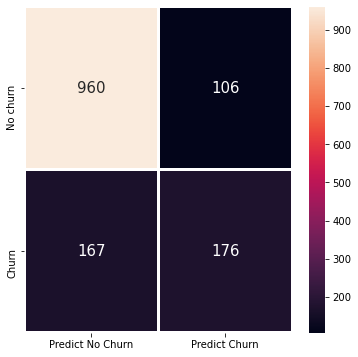

In [122]:
# calculate accuracy measures and confusion matrix
cm=metrics.confusion_matrix(y_test, preds, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True,linewidths=2, linecolor='white', fmt='g', annot_kws={"size":15}) 

In [95]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [96]:
score

array([0.80319149, 0.81737589, 0.78191489, 0.76241135, 0.80461812,
       0.79218472, 0.80639432, 0.78685613, 0.81172291, 0.79218472])

In [97]:
score.mean()

0.7958854540644723

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">PART B

**• DOMAIN:** IT <br>
    
**• CONTEXT:** The purpose is to build a machine learning pipeline that will work autonomously irrespective of Data and users can save efforts 
involved in building pipelines for each dataset. <br>

**• PROJECT OBJECTIVE:**
Build a machine learning pipeline that will run autonomously with the csv file and return best performing model.

**• STEPS AND TASK [30 Marks]:** <br>
1. Build a simple ML pipeline which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1  Dataset from Part 1 (single/merged). <br>
2. Create separate functions for various purposes. <br>
3. Various base models should be trained to select the best performing model.<br>
4. Pickle file should be saved for the best performing model. <br>
Include best coding practices in the code:
• Modularization
• Maintainability
• Well commented code etc

Purpose
1. Build Simple ML pipeline 
2. Functions for various purpose
3. train base model and choose bet performing model
4. Picke file should be saved for best performing model

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Approach to Build the Pipeline to get a data file and return best Performing model

**Approach Description:**
  
  For Building a Pipeline following approach is taken. The Main code will pass the data file to the subclasses.
  The subclasses is modularized to do the following activity
    
    Modularization:
    1. Data Analysis
    2. Data Transformation
    3. Data Visualization
    4. Split Test and Train
    5. Model Building and returning the best model
    

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Import the required Libraries


In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#from sklearn.feature_extraction.text import Cou

## Class Description

### for the purpose of modularizing and understanding there are 3 subclasses classes defined
Preprocessor - Class will be responsible for doing all the preprocessing before Model Building.
It will use below classes to do the functionalities

**1. DataAnalyser** - To Analyse the data <br>
**2. DataVisualizer**- To visualize the data in graphs and charts<br>
**3. DataTransformer** - To do the clean up, imputation etc and give the required X and Y set for model Building

**DataPreprocessor** - is the Main class which would use all the 3 above classes to do the necessary preprocessing

In [30]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#Import svm model
from sklearn import svm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Function to load the data from csv file

In [31]:
## method to build data frame from csv file
def buildDataframeFromCSV(csvFileName):
     data= pd.read_csv(csvFileName)
     return data

#### Data Analyser class has the required methods for Analysing the data.<br>

This includes<br>
    1. Checking the shape, 5 point summary<br>
    2. verifying the Null values<br>
    3. Finding categorical columns<br>
    4. Method to convert Object to numeric<br>
    5. Find column which is index -which expected to be dropped<br>
    6. Find numerical column if in Object data Type<br>

In [32]:
class DataAnalyser:
    
    """
    Class used ot Analyse the Data

    ...

    Attributes
    ----------
    data : data
        The name of the data frame for which analysis will Happen
    
    Methods
    -------
    analyseShape()
        Prints the shaope of the data, number of row and columns
    findIfNullColumns()
        Finds the percentage of null columns and prints it
    checkDataTypes()
        prints the dataTypes of each column
    check5PointSummary()
        prints 5 pointSummary
    findCategoricalData()
        Finds the categorical columns in a dataset
    printCategoricalData
        Print categorical columns in a dataset
    findNumericalData
        Prints the Numerical Data
    convertdataType
        Convert the object to Numberical
    convertObjectsToCategorical
         convert objects to categorical
    findColumnsToDrop
        Find columns to Drop
    findNumericalValuesInObject
         Find Numberical Values in object data
    """
    
    #class Constructor 
    def __init__(self, data ):
        self.data=data
    
    
    ## Method to find the shape of data
    def analyseShape(self,data):
        print("Details of Data features")
        print("---------------------------")
        print('The number of rows in the data',data.shape[0])
        print('The number of features in the data',data.shape[1])
        print("Feature Names")
        print("----------------")
        print(data.columns)
    
    ## Method to find the percentage of null columns    
    def findIfNullColumns(self,data):
        print("Percentage of Null Values")
        print("--------------------------")
        percent_missing = data.isnull().sum() * 100 / len(data)
        missing_value_data = pd.DataFrame({'Feature Name': data.columns,
                                 'percent_missing': percent_missing})
        print(missing_value_data)
     
    ## Method to check the data types of The data frame
    def checkDataTypes(self,data):
            print("Data types of all the features")
            print("-------------------------------")
            print(data.dtypes)
    
    ## Method to Print the 5 Point Summary
    def check5PointSummary(self,data):
        print("5 point summary of the data")
        print("------------------------------")
        print(data.describe().T)
        
    
    # This function would return all the categorical variables of a dataset
    def findCategoricalData(self,data):
        categorical_cols=data.select_dtypes(exclude=[np.number]).columns
        return categorical_cols
    
    # This function would Print all the categorical variables of a dataset
    def printCategoricalData(self,data):
        print("Categorical Columns")
        print("---------------------")
        categorical_cols=data.select_dtypes(exclude=[np.number]).columns
        print(categorical_cols)
    
    # This function would return all the Numerical variables of a dataset
    def findNumericalData(self,data):
        numerical_cols=data.select_dtypes(include=[np.number]).columns
        return numerical_cols
    
    # This function would print all the Numerical variables of a dataset
    def printNumericalData(self,data):
         print("Numerical Columns")
         print("---------------------")
         numerical_cols=data.select_dtypes(include=[np.number]).columns
         print(numerical_cols)
       
    #converting the data type from one data type to another
    @staticmethod
    def convertdataType(data,columnName,fromType,toType):
       # If ‘coerce’, then invalid parsing will be set as NaN.
        print('datatype before conversion', data[columnName].dtype)
        data[columnName]=pd.to_numeric(data[columnName], errors='coerce')
        print('datatype after conversion', data[columnName].dtype)
        
    ## Method to convert objects to categorical Values
    @staticmethod
    def convertObjectsToCategorical(data):
        for feature in data.columns: # Loop through all columns in the dataframe
            if data[feature].dtype == 'object': # Only apply for columns with categorical strings
                data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
            data.head(5)
            return data;
        
    ## Method to find the column which has to be dropped
    ## This method will identify the index / identifier values in a dataset which will not be useful for model building
    @staticmethod
    def findColumnsToDrop(data):
        list_of_cols = list(data.select_dtypes(['object']).columns)
        print("The features that are not helpful for model building")
        print("-----------------------------------------------------")
        dropcolumns=[]
        for cols in list_of_cols:
            var = (data[cols].nunique() - len(data[cols]))* 100 / len(data[cols])
            if (abs(var) == 0):
                 dropcolumns=cols       
         
        return dropcolumns
    
    ## This method would find number of columns having the continuous data in the Object
    
    @staticmethod
    def findNumericalValuesInObject(data):
        numericalColumn=[]
        for feature in data.columns: # Loop through all columns in the dataframe
            
            if data[feature].dtype == 'object': # Only apply for columns with categorical strings
                       # data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
                    #print(data[feature].value_counts())
                  percentage=data[feature].nunique()/len(data[feature])*100
                  if(abs(percentage)==100):
                        print('features having values 100',feature)
                  elif(abs(percentage)>=90):
                        print('features more than 90',feature)
                        numericalColumn=feature
                  else:
                    pass
        return numericalColumn
    
 

### Class DataTransformer has the methods for doing required changes in data

In [33]:
class DataTransformer:
    """
    Class used to do the required Transformations in data

    ...

    Methods
    -------
    convertObjectsToCategorical()
        Converts the Object datatypes to categorical
    dropcolumns()
        drops the specified column from the dataset
    convertdataTypeToNumeric()
        convert a column to Numeric when its object type and contain numeric value
    removeNullValues()
         Remove null values
         
    """
    ## Method to convert objects to categorical Values
   # @staticmethod
    def convertObjectsToCategorical(self):
        for feature in data.columns: # Loop through all columns in the dataframe
            if data[feature].dtype == 'object': # Only apply for columns with categorical strings
                data[feature] = pd.Categorical(data[feature])# Replace strings with an integer       
           
    
    def dropcolumns(self,cols): # if the required column name is passed that column will be dropped
        #df.drop(['C', 'D'], axis = 1)
        print('cols to drop=',cols)
        if(cols in data.columns):
            data.drop(cols, axis = 1, inplace=True)
            
    #converting the data type from object to Number 
    def convertdataTypeToNumeric(self,columnName):
       # If ‘coerce’, then invalid parsing will be set as NaN.
        print('datatype before conversion', data[columnName].dtype)
        data[columnName]=pd.to_numeric(data[columnName], errors='coerce')
        print('datatype after conversion', data[columnName].dtype)
        
       #Remove Null values
    def removeNullValues(self):
        if(data.isnull().values.any()):
            print("Null value found")
            data.dropna(how='any', inplace=True)
            
            
    def encodeCategoricalValues(self):
        dataAnalyser = DataAnalyser(data)
        categoricalColumns=dataAnalyser.findCategoricalData(data)
        for col in data[categoricalColumns]:
            data[col]=data[col].cat.codes
        return data
    

### Class DataVisualizer has the methods to Visualize the data in form of Graphs and charts

In [34]:
class DataVisualizer:
    
    """
    Class used to do Visualization of Data

    ...

    Methods
    -------
    plotCorrelation()
        to plot the correlation values
    plotBoxPlotData()
        To plot the Box Plot
    plotCountPlot()
        To plot the count Plot
    plotPairPlot()
         To plot pair plot
         
    """
    def plotCorrelation(self):
        # Correlation matrix for all variables
        corr = data.corr()

        mask = np.zeros_like(corr, dtype = np.bool)
        mask[np.triu_indices_from(mask)] = True

        f, ax = plt.subplots(figsize = (11, 9))

        cmap = sns.diverging_palette(220, 10, as_cmap = True)
        #sns.heatmap(data.corr(), center=0, cmap='mako', annot=True, fmt='.2f', linewidths=0.05)
        sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, annot=True, cbar_kws = {"shrink": .5})#, annot = True)
        ax.set_title('Correlation Matrix of Data')
        
    def plotBoxPlotData(self):
        fig = plt.figure(figsize =(10, 7))
        plot_data= data.select_dtypes(exclude=['category','object'])
 
        # Creating plot
        plt.boxplot(plot_data)
        plt.title('Box Plot for Customer churn')
       
        # show plot
        plt.show()
        
    def plotCountPlot(self,targetVariable):
        # count plot on single categorical variable
        sns.countplot(x =targetVariable, data = data)
        plt.title("Count Plot for the Target variable"+targetVariable)
        # Show the plot
        plt.show()
        
    def plotPairPlot(self,dataName,targetVariable):
        sns.pairplot(data, hue = targetVariable, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
             )
        # Title 
        plt.suptitle('Pair Plot of '+dataName, 
             size = 24);
        
    def buildPieChart(self):
        colors = sns.color_palette('pastel')[0:5]
        dataAnalyser = DataAnalyser(data)
        categoricalColumns=dataAnalyser.findCategoricalData(data)
        print('Pie chart for all categorical Columns')
       # print(categoricalColumns)
        for col in data[categoricalColumns]:
            #n = data[col].nunique()
            #activities = np.arange(n)
            #slices = np.arange(n)        
            #patches, texts = plt.pie(slices,colors=colors,startangle=90,labels=slices)
            #labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(activities,100.*slices/slices.sum())]
            plt.title("Pie chart for "+ col)
            #plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
            data[col].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, colors=colors)
            plt.show()
    

### PreProcessor Class do all the necessary work for Model building

In [39]:
class Preprocessor:
    
    """
    Class have the methods to invoke the methods of DataAnalyser, DataTransformer and Datavisualizer
    helps in invoking all the methods in sequence

    ...

    Methods
    -------
    analyseData()
        invokes all the methods of DataAnalyser in sequence
    visualizeData()
        invokes all the methods of DataVisualizer in sequence
    transformData()
        Invokes the default transformation requirement for a dataset
    encodeData()
         Transforms all categorical values to numerical for model building
         
    """
    def analyseData(self,data):
        dataAnalyser=DataAnalyser(data)
        dataAnalyser.findIfNullColumns(data)
        dataAnalyser.analyseShape(data)
        dataAnalyser.checkDataTypes(data)
        dataAnalyser.check5PointSummary(data)
        dataAnalyser.printCategoricalData(data)
        dataAnalyser.printNumericalData(data)
        self.columnsToDrop=dataAnalyser.findColumnsToDrop(data)
        self.objectColumnsHaveNumeric=dataAnalyser.findNumericalValuesInObject(data)
        print("columnsToDrop",self.columnsToDrop,'\nobjectColumnsHaveNumeric',self.objectColumnsHaveNumeric)
                 
    # Method to call all the visualization options 
    def visualizeData(self):
        dataVisualizer = DataVisualizer()
        #dataVisualizer.plotCorrelation()
        dataVisualizer.plotBoxPlotData()
        targetVariable=''
        targetVariable=targetVariable.join(data.iloc[:,-1:].columns.values)
        print(targetVariable)
        dataVisualizer.plotCountPlot(targetVariable)
        dataVisualizer.buildPieChart()
        dataVisualizer.plotPairPlot('Customer churn',targetVariable)
    
    # Method to do the necessary convertion like droping the null columns, changing the datatypes
    def transformData(self,colsToDrop,colsToConvert):
        #convertObjectsToCategorical(data)
        print("converted objects into category")
        #trans_data.dtypes()
        dataTransformer = DataTransformer()
        dataTransformer.dropcolumns(colsToDrop)
        dataTransformer.convertdataTypeToNumeric(colsToConvert)
        dataTransformer.convertObjectsToCategorical()
        dataTransformer.removeNullValues()
        
    # Method to convert the categorical columns to numerical datatype for model building   
    def encodeData(self):
        dataTransformer = DataTransformer()
        dataTransformer.encodeCategoricalValues()
        #data.head()
    
    # Split data to X , Y for model building
    def splitXY(self):
        X = data.iloc[:,:-1]
        y = data.iloc[:,-1]
        return X,y

    #Method to split Train and Test Data
    def splitTrainAndTest(self):        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
        return X_train, X_test, y_train, y_test

In [36]:
def getBestModel(data):
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier
    pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])
    pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
    pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])
    pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('knn_classifier',KNeighborsClassifier(n_neighbors = 3))])
    pipeline_svm=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=2)),
                     ('svm_classifier',svm.SVC())])

    ## Create the list of pipelines
    pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_knn,pipeline_svm]
    best_accuracy=0.0
    best_classifier=0
    best_pipeline=""
    bestmodel=""

    # Dictionary of pipelines and classifier types for ease of reference
    pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3: 'KNN',4: 'SVM'}

    # Fit the pipelines
    for pipe in pipelines:
        pipe.fit(X_train, y_train)
    
    for i,model in enumerate(pipelines):
           print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
        
        
    for i,model in enumerate(pipelines):
        if model.score(X_test,y_test)>best_accuracy:
            best_accuracy=model.score(X_test,y_test)
            best_pipeline=model
            best_classifier=i
    print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))
    #print(best_classifier)
    best_model=format(pipe_dict[best_classifier])
    #print(best_model)
    return best_model;

## Main Module to Process the Data and Build the Model

Percentage of Null Values
--------------------------
                      Feature Name  percent_missing
customerID              customerID              0.0
OnlineBackup          OnlineBackup              0.0
DeviceProtection  DeviceProtection              0.0
TechSupport            TechSupport              0.0
StreamingTV            StreamingTV              0.0
StreamingMovies    StreamingMovies              0.0
Contract                  Contract              0.0
PaperlessBilling  PaperlessBilling              0.0
PaymentMethod        PaymentMethod              0.0
MonthlyCharges      MonthlyCharges              0.0
TotalCharges          TotalCharges              0.0
Churn                        Churn              0.0
Details of Data features
---------------------------
The number of rows in the data 7043
The number of features in the data 12
Feature Names
----------------
Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 

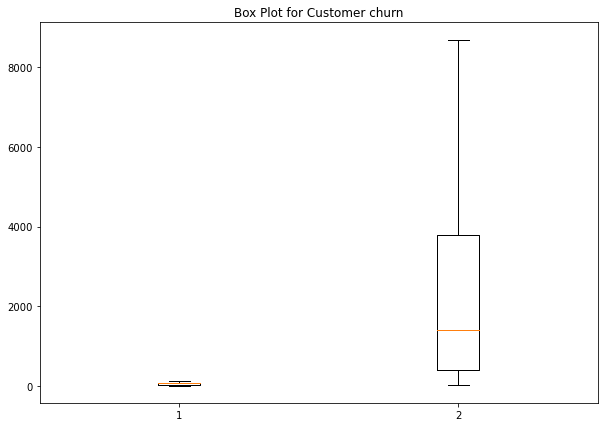

Churn


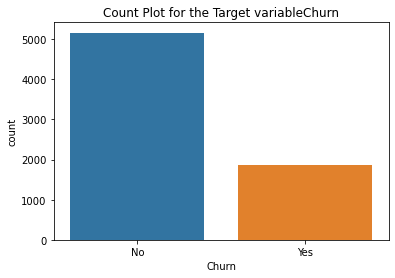

Pie chart for all categorical Columns


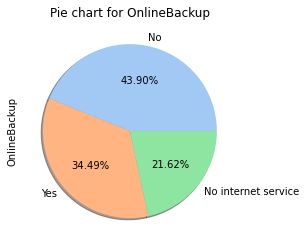

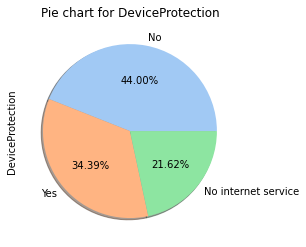

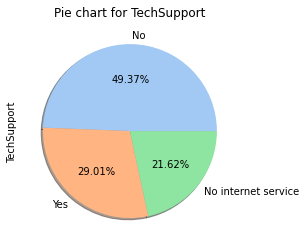

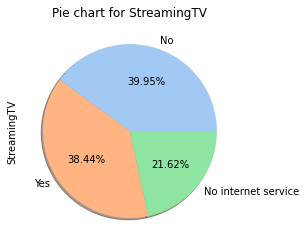

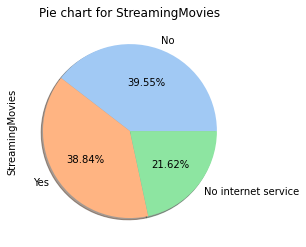

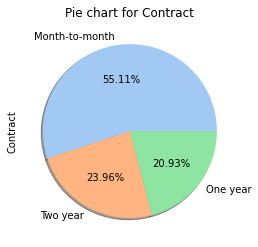

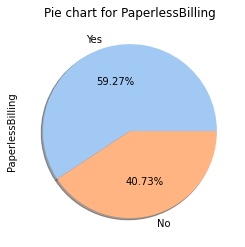

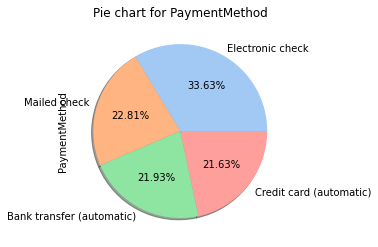

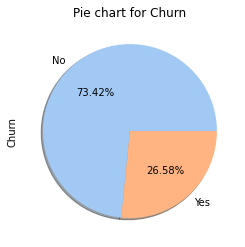

Logistic Regression Test Accuracy: 0.7571103526734926
Decision Tree Test Accuracy: 0.6996587030716723
RandomForest Test Accuracy: 0.7360637087599545
KNN Test Accuracy: 0.7309442548350398
SVM Test Accuracy: 0.7514220705346986
Classifier with best accuracy:Logistic Regression


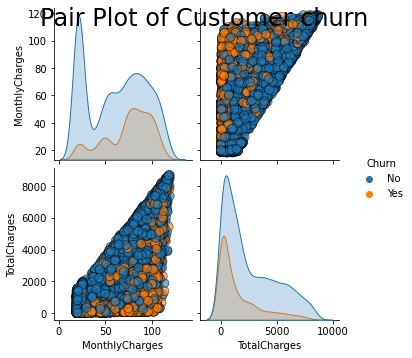

In [40]:
data=buildDataframeFromCSV('TelcomCustomer-Churn_2.csv')
preprocessor=Preprocessor()
preprocessor.analyseData(data)
#preprocessor.visualizeData()
preprocessor.transformData(preprocessor.columnsToDrop,preprocessor.objectColumnsHaveNumeric )
preprocessor.visualizeData()
preprocessor.encodeData()
X,y=preprocessor.splitXY()
X_train, X_test, y_train, y_test=preprocessor.splitTrainAndTest()
bestModel=getBestModel(data)

In [41]:
print(bestModel)

Logistic Regression


## Best Model is Identified Through Pipe Line Is Logistic Regression

In [43]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [45]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7764505119453925


In [46]:
model.coef_

array([[-2.26491844e-01, -6.95919607e-02, -2.46689113e-01,
         1.03047326e-01,  8.04626574e-02, -1.17091213e+00,
         3.54278471e-01,  3.57597966e-04,  2.20950860e-02,
        -2.62686829e-04]])

In [47]:
model.intercept_

array([-1.49071874])

### Save Model To a File Using Python Pickle

In [48]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

### Load Saved Model

In [49]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [50]:
mp.coef_

array([[-2.26491844e-01, -6.95919607e-02, -2.46689113e-01,
         1.03047326e-01,  8.04626574e-02, -1.17091213e+00,
         3.54278471e-01,  3.57597966e-04,  2.20950860e-02,
        -2.62686829e-04]])

In [53]:
mp.intercept_

array([-1.49071874])

In [55]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [56]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7764505119453925


**Observation And Conclusion:**

Through the pipe Line created able to send a dataframe and can identify the best performing model based on Accuracy.
pipeline library is the industry approach used to predict the models by sending the preprocessed data.

The best model is identified and same is saved in the pickle file which can be used for further prediction. In this product we can able to save the model and able to retrieve. When we used for prediction same accuracy received. By this way the time spent for training can be drastically reduced.